In [29]:
import sys
import glob
import argparse
import numpy as np
from scipy import stats
from typing import List
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

In [30]:
def defaultPlotting(size=9, width=180, ratio=0.5):
    mm = 1 / 25.4 # mm in an inch
    colour = '#444444'
    sns.set(rc={
        'font.size': size, 'axes.titlesize': size, 'axes.labelsize': size,
        'xtick.labelsize': size, 'ytick.labelsize': size,
        'legend.fontsize': size, 'legend.title_fontsize': size,
        'font.family': 'sans-serif', 'lines.linewidth': 1.5,
        'axes.labelcolor': colour, 'xtick.color': colour,
        'ytick.color': colour,
        'figure.figsize': (width * mm, width * ratio * mm),
        'axes.spines.top': False, 'axes.spines.right': False,
    }, style='ticks')


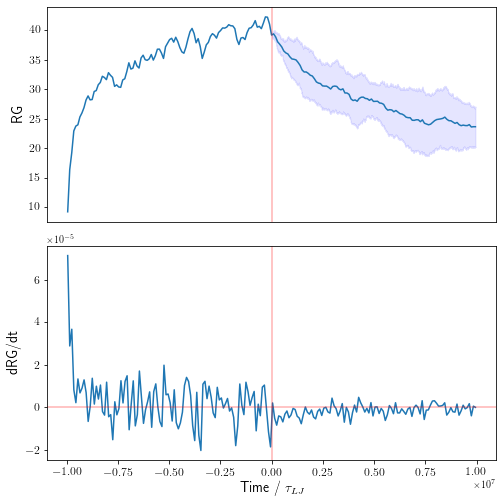

In [37]:
confidence = 0.99
equilRG = glob.glob('../../../GNG12-model/analysis-200/GNG12/2000/lammpsInit/radiusOfGyration-0.6.txt')[0]
postEquil = glob.glob('../../../GNG12-model/analysis-200/GNG12/2000/reps/*/lammps/radiusOfGyration-0.6.txt')

data = np.dstack([np.loadtxt(rep) for rep in postEquil])
mean = np.mean(data, axis=2)
time = mean[:,0]
mean = mean[:,1]

# Filter duplicate timesteps from data
time, uniqIdxs = np.unique(time, return_index=True)
mean = mean[uniqIdxs]
data = data[uniqIdxs,:,:]

equilRG = np.loadtxt(equilRG)
equilTime = equilRG[:,0]
equilVal = equilRG[:,1]
equilTime, uniqIdxs = np.unique(equilTime, return_index=True)
equilVal = equilVal[uniqIdxs]

allTime = np.concatenate([equilTime, time])
allData = np.concatenate([equilVal, mean])

allTime = allTime[::50]
allData = allData[::50]


n = len(postEquil)
std_err = stats.sem(data, axis=2)[:,1]
ci = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
dydx = np.diff(allData)/ np.diff(allTime)

midpoints = (allTime[1:] + allTime[:-1]) / 2

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(180 * (1 / 25.4), 180 * (1 / 25.4)))

ax1.plot(allTime, allData)
ax1.fill_between(time, (mean - ci), (mean + ci), color='b', alpha=.1)
ax1.axvline(x=1, color='Red', alpha=0.3)
ax1.tick_params(labelsize=12)
ax1.get_xaxis().set_visible(False)
ax1.set_ylabel('RG', fontsize=14)
ax2.plot(midpoints, dydx)
ax2.axvline(x=1, color='Red', alpha=0.3)
ax2.axhline(y=0, color='Red', alpha=0.3)
ax2.tick_params(labelsize=12)
ax2.set_xlabel(r"Time / $\tau_{LJ}$", fontsize=14)
ax2.set_ylabel('dRG/dt', fontsize=14)

fig.tight_layout()
fig.savefig('/home/stephen/phd/thesis/figures/chap3/RG-over-Time.pdf')

In [49]:
RG_reps = glob.glob('/media/stephen/Data/modelling/GNG12/5000/reps/[2-9]/lammps/radius_of_gyration.txt')
confidence = 0.95
fname = 'test.png'
dpi = 600

In [3]:
data = np.dstack([np.loadtxt(rep) for rep in RG_reps])
mean = np.mean(data, axis=2)
time = mean[:,0]
mean = mean[:,1]
std_err = stats.sem(data, axis=2)[:,1]

In [4]:
n = len(RG_reps)
confidence = 0.95
ci = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)

In [5]:
dydx = np.diff(mean)/ np.diff(time)
midpoints = (time[1:] + time[:-1]) / 2

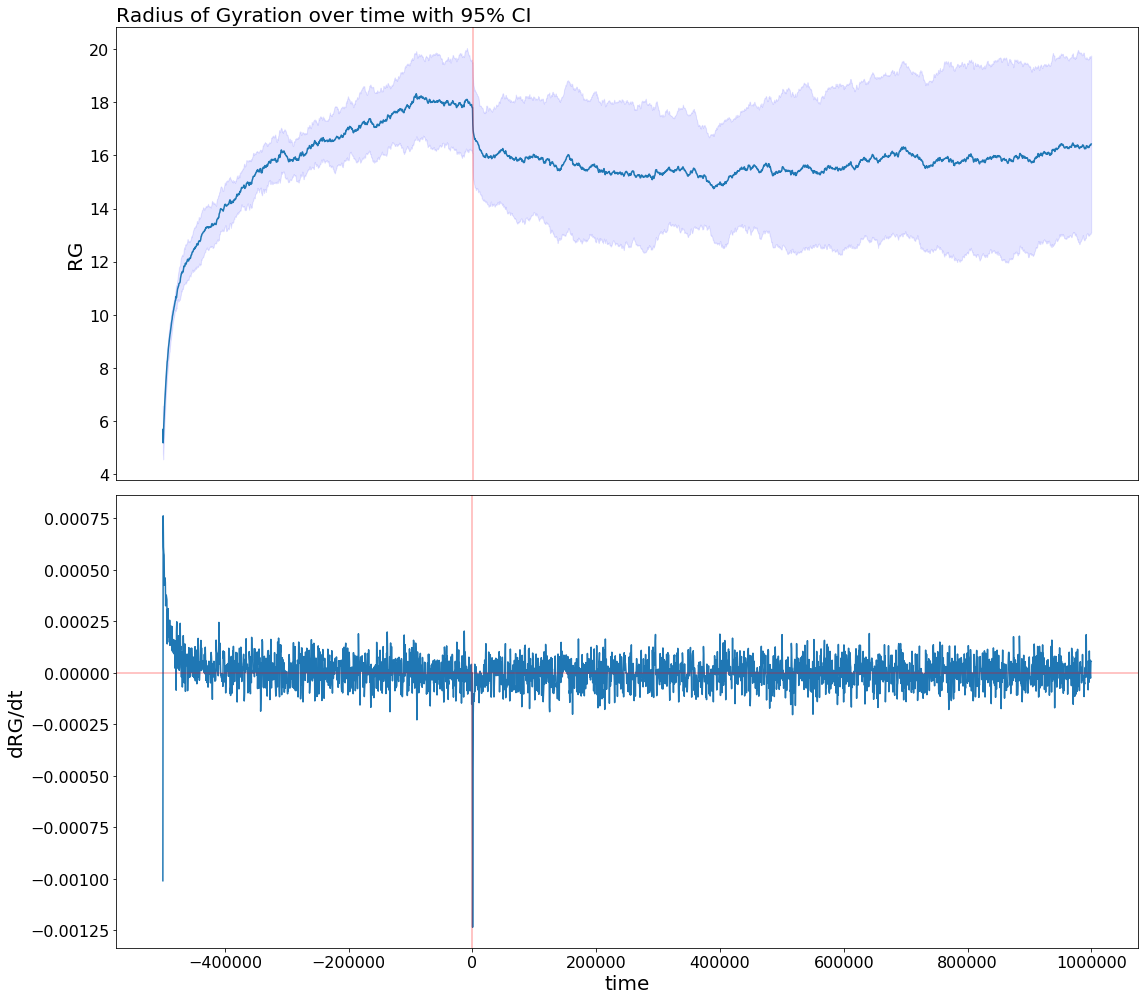

In [9]:
fig, (ax1, ax2) = plt.subplots(2,1)

ax1.plot(time, mean)
ax1.fill_between(time, (mean - ci), (mean + ci), color='b', alpha=.1)
ax1.axvline(x=1, color='Red', alpha=0.3)
ax1.tick_params(labelsize=16)
ax1.get_xaxis().set_visible(False)
ax1.set_ylabel('RG', fontsize=20)
ax1.set_title(f'Radius of Gyration over time with {confidence:.0%} CI', 
              loc='left', fontsize=20)

ax2.plot(midpoints, dydx)
ax2.axvline(x=1, color='Red', alpha=0.3)
ax2.axhline(y=0, color='Red', alpha=0.3)
ax2.tick_params(labelsize=16)
ax2.set_xlabel('time', fontsize=20)
ax2.set_ylabel('dRG/dt', fontsize=20)


fig.set_size_inches(16, 14)
fig.tight_layout()
plt.savefig(fname=fname, dpi=dpi)